<a href="https://colab.research.google.com/github/meishihna/GITHUB-COLAB/blob/main/BACKTESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **工具**

---



In [1]:
!pip install numpy
!pip install pandas_ta
!pip install ta-lib-bin > log.txt
!pip install Ta-Lib
!pip install backtrader
!pip install mplfinance
!pip install backtesting
!pip install FinMind
!pip install twstock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=bb1b5786722d6ee15d178f1dcbc7362f289929c99d24156621a33c0689cdb40d
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for Ta-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for Ta-Lib
Failed to build Ta-Lib
ERROR: 

In [2]:
import talib
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas_ta as ta
from datetime import datetime, timedelta
from matplotlib.font_manager import fontManager
from io import BytesIO

In [3]:
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzvf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# !pip install Ta-Lib

In [4]:
# fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
# mpl.rc('font', family='Taipei Sans TC Beta')

# **SMA**

---







In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from FinMind.data import DataLoader
from backtesting.lib import SignalStrategy
from talib import abstract
from backtesting.test import SMA
stock_id = input("請輸入要查詢的股票代碼:")
## 取得資料
dl = DataLoader()
df = dl.taiwan_stock_daily(stock_id, start_date='2008-01-01', end_date='2025-11-06')
## 整理資料格式
df = df.rename(columns={"date": "Date"})
df.set_index("Date" , inplace=True)
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))
## backtesting.py 格式
df1 = df.rename(columns={"open": "Open", "max": "High", "min": "Low", "close": "Close", "Trading_Volume": "Volume"})
## ta-lib 格式
df2 = df.rename(columns={"max": "high", "min": "low", "Trading_Volume": "Volume"})

class SmaCross(Strategy):
    n1 = 5
    n2 = 20

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.position.close()


bt = Backtest(df1, SmaCross,
              cash=10000, commission=.004,
              exclusive_orders=True)

output = bt.run()
print(output)
bt.plot()

請輸入要查詢的股票代碼:2610


2024-01-12 12:29:50.303 | INFO     | FinMind.data.finmind_api:get_data:123 - download TaiwanStockPrice, data_id: 2610
/usr/local/lib/python3.10/dist-packages/backtesting/backtesting.py:149: RuntimeWarning: divide by zero encountered in divide
  x = value / self._data.Close
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


Start                     2008-01-02 00:00:00
End                       2024-01-12 00:00:00
Duration                   5854 days 00:00:00
Exposure Time [%]                   49.263211
Equity Final [$]                  12267.38912
Equity Peak [$]                   22826.24672
Return [%]                          22.673891
Buy & Hold Return [%]               44.027304
Return (Ann.) [%]                    1.316995
Volatility (Ann.) [%]               24.999749
Sharpe Ratio                          0.05268
Sortino Ratio                        0.082058
Calmar Ratio                          0.02178
Max. Drawdown [%]                  -60.467232
Avg. Drawdown [%]                  -13.198363
Max. Drawdown Duration     3898 days 00:00:00
Avg. Drawdown Duration      305 days 00:00:00
# Trades                                  126
Win Rate [%]                        27.777778
Best Trade [%]                      50.299702
Worst Trade [%]                    -14.342629
Avg. Trade [%]                    

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1681', ...)

In [ ]:
pip install numpy pandas_ta  ta-lib Ta-Lib backtrader mplfinance backtesting FinMind

In [ ]:
output['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,170,32,49,58.7340,59.4,113.2200,0.011339,2008-02-25,2008-03-20,24 days
1,157,55,67,64.2560,64.5,38.3080,0.003797,2008-03-28,2008-04-16,19 days
2,145,73,78,69.5772,64.9,-678.1940,-0.067223,2008-04-24,2008-05-02,8 days
3,136,81,95,69.2760,61.7,-1030.3360,-0.109360,2008-05-07,2008-05-27,20 days
4,173,131,146,48.7944,49.6,139.3688,0.016510,2008-07-16,2008-08-07,22 days
...,...,...,...,...,...,...,...,...,...,...
113,343,3776,3827,169.6760,286.5,40070.6320,0.688512,2023-05-23,2023-08-07,76 days
114,273,3836,3857,358.9300,335.5,-6396.3900,-0.065277,2023-08-18,2023-09-18,31 days
115,267,3873,3884,343.3680,310.5,-8775.7560,-0.095722,2023-10-13,2023-10-30,17 days
116,251,3894,3923,330.8180,354.0,5818.6820,0.070075,2023-11-13,2023-12-22,39 days


**最佳化回測交易**

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from FinMind.data import DataLoader
from backtesting.lib import SignalStrategy
from talib import abstract
from backtesting.test import SMA

stock_id = input("請輸入要查詢的股票代碼:")
## 取得資料
dl = DataLoader()
df = dl.taiwan_stock_daily(stock_id, start_date='2008-01-01', end_date='2025-01-06')
## 整理資料格式
df = df.rename(columns={"date": "Date"})
df.set_index("Date" , inplace=True)
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))
## backtesting.py 格式
df1 = df.rename(columns={"open": "Open", "max": "High", "min": "Low", "close": "Close", "Trading_Volume": "Volume"})
## ta-lib 格式
df2 = df.rename(columns={"max": "high", "min": "low", "Trading_Volume": "Volume"})

class SmaCross(Strategy): #交易策略命名為SmaClass，使用backtesting.py的Strategy功能
    n1 = 5 #設定第一條均線日數為5日(周線)
    n2 = 20 #設定第二條均線日數為20日(月線)，這邊的日數可自由調整

    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1) #定義第一條均線為sma1，使用backtesting.py的SMA功能算繪
        self.sma2 = self.I(SMA, self.data.Close, self.n2) #定義第二條均線為sma2，使用backtesting.py的SMA功能算繪

    def next(self):
        if crossover(self.sma1, self.sma2): #如果周線衝上月線，表示近期是上漲的，則買入
            self.buy()
        elif crossover(self.sma2, self.sma1): #如果周線再與月線交叉，表示開始下跌了，則賣出
            self.position.close()



test = Backtest(df1, SmaCross,
              cash=10000, commission=.004,
              exclusive_orders=True)


result = test.run() #原始結果

opt_result = test.optimize(n1=range(5, 60, 5),  #將回測機器加入optimize屬性，定義短均線的周期為5~50(每次加5)，長均線的周期為10~120(每次加5)
                    n2=range(10, 120, 5),
                    maximize='Equity Final [$]',  #最佳化目標為最終資產最大化
                    constraint=lambda p: p.n1 < p.n2)  #限制n1及n2的範圍，只會計算n1小於n2的情況

print("Optimize strategy")
print(opt_result)  #印出opt_result結果

請輸入要查詢的股票代碼:00878


2024-01-19 09:53:43.255 | INFO     | FinMind.data.finmind_api:get_data:125 - download TaiwanStockPrice, data_id: 00878


Backtest.optimize:   0%|          | 0/3 [00:00<?, ?it/s]

Optimize strategy
Start                     2020-07-20 00:00:00
End                       2024-01-19 00:00:00
Duration                   1278 days 00:00:00
Exposure Time [%]                       57.28
Equity Final [$]                    14,772.78
Equity Peak [$]                     16,014.15
Return [%]                              47.73
Buy & Hold Return [%]                   38.77
Return (Ann.) [%]                       12.13
Volatility (Ann.) [%]                   11.24
Sharpe Ratio                             1.08
Sortino Ratio                            1.72
Calmar Ratio                             1.23
Max. Drawdown [%]                       -9.88
Avg. Drawdown [%]                       -1.55
Max. Drawdown Duration      701 days 00:00:00
Avg. Drawdown Duration       36 days 00:00:00
# Trades                                    5
Win Rate [%]                            60.00
Best Trade [%]                          27.36
Worst Trade [%]                         -2.70
Avg. Trade [%]  

In [ ]:
print(opt_result['_strategy'])
opt_result['_trades']

SmaCross(n1=20,n2=85)


,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,645,88,237,15.50,18.43,"1,888.71",0.19,2020-11-24,2021-07-08,226 days
1,635,259,264,18.70,18.20,-320.37,-0.03,2021-08-09,2021-08-16,7 days
2,625,320,431,18.50,18.79,178.92,0.02,2021-11-05,2022-04-26,172 days
3,713,589,787,16.47,20.97,"3,211.64",0.27,2022-12-08,2023-10-11,307 days
4,703,834,858,21.27,21.01,-186.13,-0.01,2023-12-15,2024-01-19,35 days


# **KDJ**

---



In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from FinMind.data import DataLoader
import pandas as pd
import talib
from talib import abstract

stock_id = input("請輸入要查詢的股票代碼:")
## 取得資料
dl = DataLoader()
df = dl.taiwan_stock_daily(stock_id, start_date='2013-01-01', end_date='2025-12-31')
## 整理資料格式
df = df.rename(columns={"date": "Date"})
df.set_index("Date" , inplace=True)
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))
## backtesting.py 格式
df1 = df.rename(columns={"open": "Open", "max": "High", "min": "Low", "close": "Close", "Trading_Volume": "Volume"})
## ta-lib 格式
df2 = df.rename(columns={"max": "high", "min": "low", "Trading_Volume": "Volume"})
## 取得 KD 值
df_kd = abstract.STOCH(df2,fastk_period=9, slowk_period=3,slowd_period=3)
## 合併資料
df1 = pd.merge(df1, df_kd, on="Date")

def I_bypass(data): # bypass data in Strategy
    return data

## KD 策略
class KdCross(Strategy):
    lower_bound = 20
    upper_bound = 80
    # sl_ratio = 99     # stop loss ratio, 99 means 1% loss
    def init(self):
        self.k = self.I(I_bypass, self.data.slowk) #K
        self.d = self.I(I_bypass, self.data.slowd) #D

    def next(self):
        if crossover(self.k, self.d) and self.k<self.lower_bound and self.d<self.lower_bound and not self.position: #long position
            self.buy()
        elif crossover(self.d, self.k) and self.k>self.upper_bound and self.d>self.upper_bound:
            if self.position and self.position.is_long:
                self.position.close()
bt = Backtest(df1, KdCross, cash=10000, commission=.004) ## 交易成本
output = bt.run()
print(output)
bt.plot()

In [ ]:
output['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,988,20,74,10.12020,12.95,2795.84240,0.279619,2013-01-30,2013-04-29,89 days
1,974,108,184,13.12620,12.90,-220.31880,-0.017233,2013-06-18,2013-10-04,108 days
2,972,203,245,12.92580,13.05,120.72240,0.009609,2013-11-01,2013-12-31,60 days
3,974,275,409,13.02600,9.92,-3025.24400,-0.238446,2014-02-20,2014-09-03,195 days
4,1035,419,434,9.33864,9.05,-298.74240,-0.030908,2014-09-18,2014-10-09,21 days
5,1279,442,452,7.32462,8.43,1413.78102,0.150913,2014-10-22,2014-11-05,14 days
6,1226,506,534,8.79756,8.50,-364.80856,-0.033823,2015-01-21,2015-03-11,49 days
7,1223,538,555,8.51700,9.32,982.06900,0.094282,2015-03-17,2015-04-13,27 days
8,1302,564,613,8.75748,10.00,1617.76104,0.141881,2015-04-24,2015-07-06,73 days
9,1772,629,733,7.34466,7.00,-610.73752,-0.046927,2015-07-29,2015-12-25,149 days


**最佳化回測交易**

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from FinMind.data import DataLoader
import pandas as pd
import talib
from talib import abstract

stock_id = input("請輸入要查詢的股票代碼:")
## 取得資料
dl = DataLoader()
df = dl.taiwan_stock_daily(stock_id, start_date='2008-01-01', end_date='2025-12-25')
## 整理資料格式
df = df.rename(columns={"date": "Date"})
df.set_index("Date" , inplace=True)
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))
## backtesting.py 格式
df1 = df.rename(columns={"open": "Open", "max": "High", "min": "Low", "close": "Close", "Trading_Volume": "Volume"})
## ta-lib 格式
df2 = df.rename(columns={"max": "high", "min": "low", "Trading_Volume": "Volume"})
## 取得 KD 值
df_kd = abstract.STOCH(df2,fastk_period=9, slowk_period=3,slowd_period=3)
## 合併資料
df1 = pd.merge(df1, df_kd, on="Date")

def I_bypass(data): # bypass data in Strategy
    return data

## KD 策略
class KdCross(Strategy):
    lower_bound = 20
    upper_bound = 80
    # sl_ratio = 99     # stop loss ratio, 99 means 1% loss
    def init(self):
        self.k = self.I(I_bypass, self.data.slowk) #K
        self.d = self.I(I_bypass, self.data.slowd) #D

    def next(self):
        if crossover(self.k, self.d) and self.k<self.lower_bound and self.d<self.lower_bound and not self.position: #long position
            self.buy()
        elif crossover(self.d, self.k) and self.k>self.upper_bound :# and self.d>self.upper_bound:
            if self.position and self.position.is_long:
                self.position.close()

bt = Backtest(df1, KdCross, cash=10000, commission=.004) ## 交易成本

opt_result = bt.optimize(lower_bound=range(10, 40, 3),  #將回測機器加入optimize屬性，定義短均線的周期、長均線的周期
                    upper_bound=range(60, 90, 3),
                    maximize='Equity Final [$]', #最佳化目標為最終資產最大化
                    # return_heatmap = True,
                    )
print("Optimize strategy")
print(opt_result)  #印出opt_result結果

請輸入要查詢的股票代碼:2405


2024-01-03 11:47:40.577 | INFO     | FinMind.data.finmind_api:get_data:123 - download TaiwanStockPrice, data_id: 2405


Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

Optimize strategy
Start                     2008-01-02 00:00:00
End                       2023-12-25 00:00:00
Duration                   5836 days 00:00:00
Exposure Time [%]                   82.693774
Equity Final [$]                  67101.85664
Equity Peak [$]                   72309.65664
Return [%]                         571.018566
Buy & Hold Return [%]               61.926606
Return (Ann.) [%]                   12.965187
Volatility (Ann.) [%]               46.141318
Sharpe Ratio                         0.280989
Sortino Ratio                        0.512643
Calmar Ratio                         0.188654
Max. Drawdown [%]                   -68.72465
Avg. Drawdown [%]                  -12.743979
Max. Drawdown Duration     2852 days 00:00:00
Avg. Drawdown Duration      237 days 00:00:00
# Trades                                   41
Win Rate [%]                         60.97561
Best Trade [%]                      93.809146
Worst Trade [%]                    -36.869065
Avg. Trade [%]  

In [ ]:
print(opt_result['_strategy'])
opt_result['_trades']

KdCross(lower_bound=28,upper_bound=84)


,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,986,18,31,10.14040,12.60,2425.16560,0.242555,2008-01-28,2008-02-22,25 days
1,944,53,63,13.15240,15.05,1791.33440,0.144278,2008-03-26,2008-04-10,15 days
2,931,88,92,15.26080,16.45,1107.14520,0.077925,2008-05-16,2008-05-22,6 days
3,997,100,151,15.36120,13.15,-2204.56640,-0.143947,2008-06-03,2008-08-14,72 days
4,1232,169,209,10.64240,7.36,-4043.91680,-0.308427,2008-09-09,2008-11-06,58 days
5,1386,219,316,6.54608,9.00,3401.13312,0.374869,2008-11-20,2009-04-15,146 days
6,1565,323,333,7.97176,15.45,11703.44560,0.938091,2009-04-24,2009-05-11,17 days
7,1433,357,368,16.86720,19.30,3486.20240,0.144233,2009-06-15,2009-06-30,15 days
8,1485,396,439,18.62420,27.80,13626.06300,0.492682,2009-08-10,2009-10-08,59 days
9,1692,450,466,24.39720,26.00,2711.93760,0.065696,2009-10-23,2009-11-16,24 days


# **RSI**

---



In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from FinMind.data import DataLoader
from backtesting.lib import SignalStrategy
from talib import abstract
from backtesting.test import SMA
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply

stock_id = input("請輸入要查詢的股票代碼:")
## 取得資料
dl = DataLoader()
df = dl.taiwan_stock_daily(stock_id, start_date='2013-01-01', end_date='2025-12-25')
## 整理資料格式
df = df.rename(columns={"date": "Date"})
df.set_index("Date" , inplace=True)
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))
## backtesting.py 格式
df1 = df.rename(columns={"open": "Open", "max": "High", "min": "Low", "close": "Close", "Trading_Volume": "Volume"})
## ta-lib 格式
df2 = df.rename(columns={"max": "high", "min": "low", "Trading_Volume": "Volume"})

def SMA(array, n):
    """Simple moving average"""
    return pd.Series(array).rolling(n).mean()

def RSI(array, n):
    """Relative strength index"""
    # Approximate; good enough
    gain = pd.Series(array).diff()
    loss = gain.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    rs = gain.ewm(n).mean() / loss.abs().ewm(n).mean()
    return 100 - 100 / (1 + rs)

class System(Strategy):
    d_rsi = 30  # Daily RSI lookback periods
    w_rsi = 30  # Weekly
    level = 70

    def init(self):
        # Compute moving averages the strategy demands
        self.ma10 = self.I(SMA, self.data.Close, 10)
        self.ma20 = self.I(SMA, self.data.Close, 20)
        self.ma50 = self.I(SMA, self.data.Close, 50)
        self.ma100 = self.I(SMA, self.data.Close, 100)

        # Compute daily RSI(30)
        self.daily_rsi = self.I(RSI, self.data.Close, self.d_rsi)

        # To construct weekly RSI, we can use `resample_apply()`
        # helper function from the library
        self.weekly_rsi = resample_apply(
            'W-FRI', RSI, self.data.Close, self.w_rsi)


    def next(self):
        price = self.data.Close[-1]

        # If we don't already have a position, and
        # if all conditions are satisfied, enter long.
        if (not self.position and
            self.daily_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.daily_rsi[-1] and
            self.ma10[-1] > self.ma20[-1] > self.ma50[-1] > self.ma100[-1] and
            price > self.ma10[-1]):

            # Buy at market price on next open, but do
            # set 8% fixed stop loss.
            self.buy(sl=.92 * price)

        # If the price closes 2% or more below 10-day MA
        # close the position, if any.
        elif price < .98 * self.ma10[-1]:
            self.position.close()


bt = Backtest(df1, System,
              cash=10000, commission=.004,
              exclusive_orders=True)

stats= bt.run()
print(stats)
bt.plot()

In [ ]:
stats['_trades']

**最佳化回測交易**

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from FinMind.data import DataLoader
from backtesting.lib import SignalStrategy
from talib import abstract
from backtesting.test import SMA
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply

stock_id = input("請輸入要查詢的股票代碼:")
## 取得資料
dl = DataLoader()
df = dl.taiwan_stock_daily(stock_id, start_date='2008-01-01', end_date='2025-12-25')
## 整理資料格式
df = df.rename(columns={"date": "Date"})
df.set_index("Date" , inplace=True)
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))
## backtesting.py 格式
df1 = df.rename(columns={"open": "Open", "max": "High", "min": "Low", "close": "Close", "Trading_Volume": "Volume"})
## ta-lib 格式
df2 = df.rename(columns={"max": "high", "min": "low", "Trading_Volume": "Volume"})

def SMA(array, n):
    """Simple moving average"""
    return pd.Series(array).rolling(n).mean()

def RSI(array, n):
    """Relative strength index"""
    # Approximate; good enough
    gain = pd.Series(array).diff()
    loss = gain.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    rs = gain.ewm(n).mean() / loss.abs().ewm(n).mean()
    return 100 - 100 / (1 + rs)

class System(Strategy):
    d_rsi = 30  # Daily RSI lookback periods
    w_rsi = 30  # Weekly
    level = 70

    def init(self):
        # Compute moving averages the strategy demands
        self.ma10 = self.I(SMA, self.data.Close, 10)
        self.ma20 = self.I(SMA, self.data.Close, 20)
        self.ma50 = self.I(SMA, self.data.Close, 50)
        self.ma100 = self.I(SMA, self.data.Close, 100)

        # Compute daily RSI(30)
        self.daily_rsi = self.I(RSI, self.data.Close, self.d_rsi)

        # To construct weekly RSI, we can use `resample_apply()`
        # helper function from the library
        self.weekly_rsi = resample_apply(
            'W-FRI', RSI, self.data.Close, self.w_rsi)


    def next(self):
        price = self.data.Close[-1]

        # If we don't already have a position, and
        # if all conditions are satisfied, enter long.
        if (not self.position and
            self.daily_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.daily_rsi[-1] and
            self.ma10[-1] > self.ma20[-1] > self.ma50[-1] > self.ma100[-1] and
            price > self.ma10[-1]):

            # Buy at market price on next open, but do
            # set 8% fixed stop loss.
            self.buy(sl=.92 * price)

        # If the price closes 2% or more below 10-day MA
        # close the position, if any.
        elif price < .98 * self.ma10[-1]:
            self.position.close()


bt = Backtest(df1, System,
              cash=10000, commission=.004,
              exclusive_orders=True)

opt_result = bt.optimize(d_rsi=range(10, 35, 5),
                  w_rsi=range(10, 35, 5),
                  level=range(30, 80, 10),maximize='Equity Final [$]')
print("Optimize strategy")
print(opt_result)  #印出opt_result結果

請輸入要查詢的股票代碼:2405


2024-01-03 06:17:54.964 | INFO     | FinMind.data.finmind_api:get_data:123 - download TaiwanStockPrice, data_id: 2405


Backtest.optimize:   0%|          | 0/3 [00:00<?, ?it/s]

Optimize strategy
Start                     2008-01-02 00:00:00
End                       2023-12-25 00:00:00
Duration                   5836 days 00:00:00
Exposure Time [%]                   10.165184
Equity Final [$]                  15675.06764
Equity Peak [$]                   27376.59112
Return [%]                          56.750676
Buy & Hold Return [%]               61.926606
Return (Ann.) [%]                     2.92037
Volatility (Ann.) [%]               19.253421
Sharpe Ratio                         0.151681
Sortino Ratio                        0.253071
Calmar Ratio                         0.059787
Max. Drawdown [%]                   -48.84659
Avg. Drawdown [%]                  -19.372204
Max. Drawdown Duration     2846 days 00:00:00
Avg. Drawdown Duration      806 days 00:00:00
# Trades                                   41
Win Rate [%]                        31.707317
Best Trade [%]                     114.374291
Worst Trade [%]                    -10.657371
Avg. Trade [%]  

In [ ]:
print(opt_result['_strategy'])
opt_result['_trades']

# **MACD**

---














In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from FinMind.data import DataLoader
import pandas as pd
import numpy as np
import talib as ta
from talib import abstract,EMA
from backtesting.test import SMA
stock_id = input("請輸入要查詢的股票代碼:")
## 取得資料
dl = DataLoader()
df = dl.taiwan_stock_daily(stock_id, start_date='2008-01-01', end_date='2025-12-25')
## 整理資料格式
df = df.rename(columns={"date": "Date"})
df.set_index("Date" , inplace=True)
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))
## backtesting.py 格式
df1 = df.rename(columns={"open": "Open", "max": "High", "min": "Low", "close": "Close", "Trading_Volume": "Volume"})
## ta-lib 格式
df2 = df.rename(columns={"max": "high", "min": "low", "Trading_Volume": "Volume"})
## 取得 KD 值
df_kd = abstract.STOCH(df2,fastk_period=9, slowk_period=3,slowd_period=3)
## 合併資料
df1 = pd.merge(df1, df_kd, on="Date")

# 定義 MACD 策略
def MACD(close, n1, n2, ns):
    macd, macdsignal, macdhist = ta.MACD(close, fastperiod=n1, slowperiod=n2, signalperiod=ns)
    return macd, macdsignal

class MACDCross(Strategy):
    n1 = 12 #短期EMA期間
    n2 = 26 #長期EMA期間
    ns = 9 #（MACDのSMA）期間

    def init(self):
        self.macd, self.macdsignal = self.I(MACD, self.data.Close, self.n1, self.n2, self.ns)

    def next(self):
        if crossover(self.macd, self.macdsignal):
            self.buy()
        elif crossover(self.macdsignal, self.macd):
            self.position.close()

bt = Backtest(
    df1,
    MACDCross,
    cash=10000,  # 初始資金
    commission=0.00495,  # 交易手續費
    margin=1.0,  # 槓桿倍數的倒數（0.5表示2倍槓桿）
    trade_on_close=True,  # True：以當前收盤價進行交易，False：以下一個時間點的開盤價進行交易
    exclusive_orders=True  # 自動關閉現有持倉（開倉）
)


output = bt.run()
print(output)
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


請輸入要查詢的股票代碼:2331


2024-01-20 05:57:10.750 | INFO     | FinMind.data.finmind_api:get_data:125 - download TaiwanStockPrice, data_id: 2331


Start                     2008-01-02 00:00:00
End                       2024-01-19 00:00:00
Duration                   5861 days 00:00:00
Exposure Time [%]                   52.566057
Equity Final [$]                  7864.365238
Equity Peak [$]                  16708.842558
Return [%]                         -21.356348
Buy & Hold Return [%]              125.182482
Return (Ann.) [%]                   -1.526374
Volatility (Ann.) [%]               28.493306
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -63.422923
Avg. Drawdown [%]                  -17.741653
Max. Drawdown Duration     2311 days 00:00:00
Avg. Drawdown Duration      301 days 00:00:00
# Trades                                  153
Win Rate [%]                        30.065359
Best Trade [%]                      47.418427
Worst Trade [%]                    -24.676648
Avg. Trade [%]                    

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1362', ...)

In [ ]:
output['_trades']

**最佳化回測交易**

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from FinMind.data import DataLoader
import pandas as pd
import numpy as np
import talib as ta
from talib import abstract,EMA
from backtesting.test import SMA
stock_id = input("請輸入要查詢的股票代碼:")
## 取得資料
dl = DataLoader()
df = dl.taiwan_stock_daily(stock_id, start_date='2008-01-01', end_date='2025-12-31')
## 整理資料格式
df = df.rename(columns={"date": "Date"})
df.set_index("Date" , inplace=True)
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))
## backtesting.py 格式
df1 = df.rename(columns={"open": "Open", "max": "High", "min": "Low", "close": "Close", "Trading_Volume": "Volume"})
## ta-lib 格式
df2 = df.rename(columns={"max": "high", "min": "low", "Trading_Volume": "Volume"})
## 取得 KD 值
df_kd = abstract.STOCH(df2,fastk_period=9, slowk_period=3,slowd_period=3)
## 合併資料
df1 = pd.merge(df1, df_kd, on="Date")

# 定義 MACD 策略
def MACD(close, n1, n2, ns):
    dif, macd, macdhist = ta.MACD(close, fastperiod=n1, slowperiod=n2, signalperiod=ns)
    return dif, macd

class MACDCross(Strategy):
    n1 = 12 #短期EMA期間
    n2 = 26 #長期EMA期間
    ns = 9 #（MACDのSMA）期間

    def init(self):
        self.dif, self.macd = self.I(MACD, self.data.Close, self.n1, self.n2, self.ns)

    def next(self):
        if crossover(self.dif, self.macd) and self.dif < 0.5:
            self.buy()
        elif crossover(self.macd, self.dif):
            self.position.close()

bt = Backtest(
    df1,
    MACDCross,
    cash=10000,  # 初始資金
    commission=0.004,  # 交易手續費
    margin=1.0,  # 槓桿倍數的倒數（0.5表示2倍槓桿）
    trade_on_close=True,  # True：以當前收盤價進行交易，False：以下一個時間點的開盤價進行交易
    exclusive_orders=True  # 自動關閉現有持倉（開倉）
)

#最適化
output2=bt.optimize(n1=range(10, 50, 2),
          n2=range(20, 250, 5),
          ns=range(5, 50, 5),
          maximize='Equity Final [$]',
          method='grid')
print(output2)

In [ ]:
print(output2['_strategy'])
output2['_trades']

MACDCross(n1=12,n2=245,ns=10)


,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,1527,265,355,6.54608,17.75,17108.38584,1.711546,2009-02-03,2009-06-11,128 days
1,1122,603,620,24.14620,24.25,116.46360,0.004299,2010-06-07,2010-07-01,24 days
2,1069,649,658,25.45140,24.30,-1230.84660,-0.045239,2010-08-11,2010-08-24,13 days
3,1041,670,692,24.94940,25.00,52.67460,0.002028,2010-09-09,2010-10-12,33 days
4,1150,730,741,22.64020,21.00,-1886.23000,-0.072446,2010-12-03,2010-12-20,17 days
...,...,...,...,...,...,...,...,...,...,...
63,3212,3659,3685,12.14840,12.50,1129.33920,0.028942,2022-11-04,2022-12-12,38 days
64,3319,3712,3740,12.09820,12.30,669.77420,0.016680,2023-01-31,2023-03-14,42 days
65,3189,3758,3769,12.80100,12.35,-1438.23900,-0.035232,2023-04-12,2023-04-27,15 days
66,3052,3771,3776,12.90140,12.35,-1682.87280,-0.042740,2023-05-02,2023-05-09,7 days


# **CCI**

In [10]:
from backtesting.lib import SignalStrategy
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from FinMind.data import DataLoader
import pandas as pd
import numpy as np
import talib as ta
from talib import abstract,EMA
from backtesting.test import SMA
from talib import CCI

stock_id = input("請輸入要查詢的股票代碼:")
## 取得資料
dl = DataLoader()
df = dl.taiwan_stock_daily(stock_id, start_date='2013-01-01', end_date='2025-12-25')
## 整理資料格式
df = df.rename(columns={"date": "Date"})
df.set_index("Date" , inplace=True)
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))
## backtesting.py 格式
df1 = df.rename(columns={"open": "Open", "max": "High", "min": "Low", "close": "Close", "Trading_Volume": "Volume"})
## ta-lib 格式
df2 = df.rename(columns={"max": "high", "min": "low", "Trading_Volume": "Volume"})
## 取得 KD 值
df_kd = abstract.STOCH(df2,fastk_period=9, slowk_period=3,slowd_period=3)
## 合併資料
df1 = pd.merge(df1, df_kd, on="Date")

# 定義 MACD 策略
def MACD(close, n1, n2, ns):
    macd, macdsignal, macdhist = ta.MACD(close, fastperiod=n1, slowperiod=n2, signalperiod=ns)
    return macd, macdsignal

class MACDCCI(Strategy):
    n1 = 12  # 短期EMA期間
    n2 = 26  # 長期EMA期間
    ns = 9   # （MACD的SMA）期間
    cci_period = 14

    def init(self):
        # MACD 初始化
        self.macd, self.macdsignal = self.I(MACD, self.data.Close, self.n1, self.n2, self.ns)

        # CCI 初始化
        self.cci = self.I(CCI, self.data.High, self.data.Low, self.data.Close, self.cci_period)

    def next(self):
        # MACD 大於零且MACD柱正在伸長
        macd_condition = self.macd > 0 and (self.macd - self.macdsignal) > 0

        # CCI 上穿 100
        cci_condition = crossover(self.cci, 100)

        # CCI 下穿 -100
        cci_below_condition = crossover(-100, self.cci)

        if macd_condition and cci_condition:
            self.buy()

        # MACD 出現死叉或來到零線之下或CCI下穿-100
        elif crossover(self.macdsignal, self.macd) or self.macd < 0 or cci_below_condition:
            self.position.close()

bt = Backtest(df1, MACDCCI,
              cash=10000, commission=.004,
              exclusive_orders=True)

stats= bt.run()
print(stats)
bt.plot()

請輸入要查詢的股票代碼:2331


2024-01-20 10:00:32.521 | INFO     | FinMind.data.finmind_api:get_data:125 - download TaiwanStockPrice, data_id: 2331


Start                     2013-01-02 00:00:00
End                       2024-01-19 00:00:00
Duration                   4034 days 00:00:00
Exposure Time [%]                   20.982143
Equity Final [$]                   10721.5048
Equity Peak [$]                    16786.8796
Return [%]                           7.215048
Buy & Hold Return [%]              232.793959
Return (Ann.) [%]                     0.65526
Volatility (Ann.) [%]               19.257243
Sharpe Ratio                         0.034027
Sortino Ratio                        0.051899
Calmar Ratio                         0.018029
Max. Drawdown [%]                  -36.345736
Avg. Drawdown [%]                    -8.91422
Max. Drawdown Duration     2452 days 00:00:00
Avg. Drawdown Duration      323 days 00:00:00
# Trades                                   75
Win Rate [%]                        41.333333
Best Trade [%]                      28.006493
Worst Trade [%]                    -19.503571
Avg. Trade [%]                    

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p3163', ...)

In [6]:
stats['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,991,35,36,10.0902,10.10,9.7118,0.000971,2013-03-01,2013-03-04,3 days
1,987,36,37,10.1404,10.15,9.4752,0.000947,2013-03-04,2013-03-05,1 days
2,983,37,38,10.1906,10.20,9.2402,0.000922,2013-03-05,2013-03-06,1 days
3,979,38,39,10.2408,9.80,-431.5432,-0.043044,2013-03-06,2013-03-07,1 days
4,975,39,40,9.8392,9.88,39.7800,0.004147,2013-03-07,2013-03-08,1 days
...,...,...,...,...,...,...,...,...,...,...
901,15,2675,2676,31.7766,33.15,20.6010,0.043220,2024-01-03,2024-01-04,1 days
902,14,2676,2677,33.2826,31.65,-22.8564,-0.049053,2024-01-04,2024-01-05,1 days
903,14,2677,2678,31.7766,32.40,8.7276,0.019618,2024-01-05,2024-01-08,3 days
904,14,2678,2679,32.5296,32.20,-4.6144,-0.010132,2024-01-08,2024-01-09,1 days


**最佳化回測交易**

In [13]:
from backtesting.lib import SignalStrategy
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from FinMind.data import DataLoader
import pandas as pd
import numpy as np
import talib as ta
from talib import abstract,EMA
from backtesting.test import SMA
from talib import CCI

stock_id = input("請輸入要查詢的股票代碼:")
## 取得資料
dl = DataLoader()
df = dl.taiwan_stock_daily(stock_id, start_date='2013-01-01', end_date='2025-12-25')
## 整理資料格式
df = df.rename(columns={"date": "Date"})
df.set_index("Date" , inplace=True)
df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))
## backtesting.py 格式
df1 = df.rename(columns={"open": "Open", "max": "High", "min": "Low", "close": "Close", "Trading_Volume": "Volume"})
## ta-lib 格式
df2 = df.rename(columns={"max": "high", "min": "low", "Trading_Volume": "Volume"})
## 取得 KD 值
df_kd = abstract.STOCH(df2,fastk_period=9, slowk_period=3,slowd_period=3)
## 合併資料
df1 = pd.merge(df1, df_kd, on="Date")

# 定義 MACD 策略
def MACD(close, n1, n2, ns):
    macd, macdsignal, macdhist = ta.MACD(close, fastperiod=n1, slowperiod=n2, signalperiod=ns)
    return macd, macdsignal

class MACDCCI(Strategy):
    n1 = 12  # 短期EMA期間
    n2 = 26  # 長期EMA期間
    ns = 9   # （MACD的SMA）期間
    cci_period = 14

    def init(self):
        # MACD 初始化
        self.macd, self.macdsignal = self.I(MACD, self.data.Close, self.n1, self.n2, self.ns)

        # CCI 初始化
        self.cci = self.I(CCI, self.data.High, self.data.Low, self.data.Close, self.cci_period)

    def next(self):
        # MACD 大於零且MACD柱正在伸長
        macd_condition = self.macd > 0 and (self.macd - self.macdsignal) > 0

        # CCI 上穿 100
        cci_condition = crossover(self.cci, 100)

        # CCI 下穿 -100
        cci_below_condition = crossover(-100, self.cci)

        if macd_condition and cci_condition:
            self.buy()

        # MACD 出現死叉或來到零線之下或CCI下穿-100
        elif crossover(self.macdsignal, self.macd) or self.macd < 0 or cci_below_condition:
            self.position.close()

bt = Backtest(df1, MACDCCI,
              cash=10000, commission=.004,
              exclusive_orders=True)

opt_result=bt.optimize(cci_period=range(3, 24, 1),
          maximize='Equity Final [$]',
          method='grid')
print(opt_result)

請輸入要查詢的股票代碼:2401


2024-01-20 10:52:29.138 | INFO     | FinMind.data.finmind_api:get_data:125 - download TaiwanStockPrice, data_id: 2401


Backtest.optimize:   0%|          | 0/3 [00:00<?, ?it/s]

Start                     2013-01-02 00:00:00
End                       2024-01-19 00:00:00
Duration                   4034 days 00:00:00
Exposure Time [%]                   25.175601
Equity Final [$]                    4765.2452
Equity Peak [$]                    11036.6922
Return [%]                         -52.347548
Buy & Hold Return [%]              259.002169
Return (Ann.) [%]                   -6.672387
Volatility (Ann.) [%]               18.044664
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -63.830906
Avg. Drawdown [%]                  -35.016096
Max. Drawdown Duration     3885 days 00:00:00
Avg. Drawdown Duration     1985 days 00:00:00
# Trades                                  127
Win Rate [%]                         40.15748
Best Trade [%]                      26.596418
Worst Trade [%]                    -10.395592
Avg. Trade [%]                    

In [14]:
print(opt_result['_strategy'])
opt_result['_trades']

MACDCCI(cci_period=6)


,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,1016,37,42,9.8392,9.56,-283.6672,-0.028376,2013-03-05,2013-03-12,7 days
1,1035,75,84,9.3874,9.24,-152.5590,-0.015702,2013-04-30,2013-05-14,14 days
2,972,90,94,9.8392,11.10,1225.4976,0.128140,2013-05-22,2013-05-28,6 days
3,968,94,101,11.1444,10.95,-188.1792,-0.017444,2013-05-28,2013-06-06,9 days
4,902,129,133,11.7468,10.65,-989.3136,-0.093370,2013-07-17,2013-07-23,6 days
...,...,...,...,...,...,...,...,...,...,...
122,146,2611,2616,34.9392,31.80,-458.3232,-0.089848,2023-09-06,2023-09-13,7 days
123,147,2642,2644,31.7766,32.10,47.5398,0.010177,2023-10-24,2023-10-26,2 days
124,146,2644,2648,32.2284,30.55,-245.0464,-0.052078,2023-10-26,2023-11-01,6 days
125,136,2660,2668,32.7806,37.05,580.6384,0.130242,2023-11-17,2023-11-29,12 days


# 新增區段

[*********************100%%**********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe31eea5j/blaqjheo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe31eea5j/o5idtwpa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25742', 'data', 'file=/tmp/tmpe31eea5j/blaqjheo.json', 'init=/tmp/tmpe31eea5j/o5idtwpa.json', 'output', 'file=/tmp/tmpe31eea5j/prophet_modelhol76hhl/prophet_model-20240119135131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:51:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


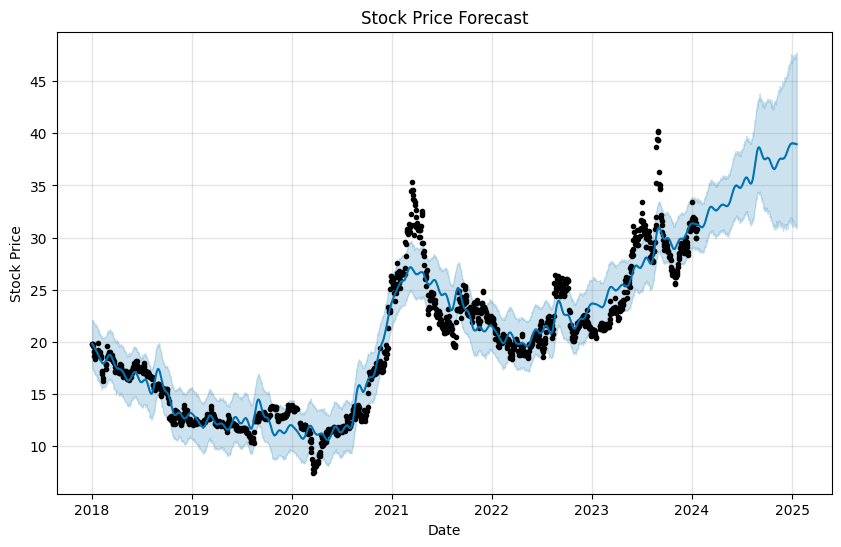

In [ ]:
from prophet import Prophet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 获取股价数据
def get_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data['Close'].reset_index()

# 准备数据
def prepare_data(stock_data):
    data = stock_data.rename(columns={'Date': 'ds', 'Close': 'y'})
    return data

# 训练模型和进行预测
def train_and_predict(data):
    model = Prophet(daily_seasonality=True)
    model.fit(data)

    future = model.make_future_dataframe(periods=365)  # 预测未来一年
    forecast = model.predict(future)

    return model, forecast

# 可视化结果
def plot_results(data, forecast):
    fig, ax = plt.subplots(figsize=(10, 6))
    model.plot(forecast, ax=ax)
    ax.set_title('Stock Price Forecast')
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock Price')
    plt.show()

# 主程序
if __name__ == "__main__":
    symbol = '2331.tw'  # 你想要预测的股票代码
    start_date = '2018-01-01'
    end_date = '2025-01-01'

    stock_data = get_stock_data(symbol, start_date, end_date)
    data = prepare_data(stock_data)

    model, forecast = train_and_predict(data)

    plot_results(data, forecast)

In [ ]:
from prophet import Prophet
import twstock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

# 改style要在改font之前
plt.rcParams["axes.unicode_minus"] = False
pd.options.mode.chained_assignment = None  #取消顯示pandas資料重設警告

# 函數：獲取股票數據
def get_stock_data(stock_code, months):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=months * 30)

    stock_data = twstock.Stock(stock_code)
    raw_data = stock_data.fetch_from(start_date.year, start_date.month)
    df = pd.DataFrame(raw_data)
    df.set_index('date', inplace=True)
    return df

# 主程式
stock_code = input("請輸入股票代碼（例如：2330）：")
months = int(input("請輸入查詢的月數："))
TIME_STEPS = int(input("使用多少天的數據進行回測:"))  # 使用過去7天的數據進行預測
FUTURE_DAYS = int(input("預測未來幾天:"))  # 預測未來幾天

# 獲取股票數據
stock_data = get_stock_data(stock_code, months)
USD = stock_data['close']

# 準備訓練數據
data_all = np.array(USD).astype(float)
data_all_reshaped = data_all.reshape(-1, 1)
# 建立 MinMaxScaler 物件
scaler = MinMaxScaler()
data_all_reshaped = scaler.fit_transform(data_all_reshaped)  # 將數據縮放為 0~1之間
data = []

# data 資料共有 (239-7)=232筆
for i in range(len(data_all_reshaped) - TIME_STEPS):
    # 每筆 data 資料有 8 欄
    data.append(data_all_reshaped[i: i + TIME_STEPS + 1])
reshaped_data = np.array(data).astype('float64')
x = reshaped_data[:, :-1] # 第 1至第7個欄位為 特徵
y = reshaped_data[:, -1]  # 第 8個欄位為 標籤

split=0.8
split_boundary = int(reshaped_data.shape[0] * split)
train_x = x[: split_boundary] # 前 80% 為 train 的特徵
test_x = x[split_boundary:]   # 最後 20% 為 test 的特徵
train_y = y[: split_boundary] # 前 80% 為 train 的 label
test_y = y[split_boundary:]   # 最後 20% 為 test 的 label

# 建立 SimpleRNN 模型
model = Sequential()
# 隱藏層：256 個神經元，input_shape：(7,1)
INPUT_SIZE=1
model.add(SimpleRNN(input_shape=(TIME_STEPS,INPUT_SIZE),units=256,unroll=False))
model.add(Dropout(0.2))   #建立拋棄層，拋棄比例為20%
model.add(Dense(units=1)) #輸出層：1 個神經元
model.summary()
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=5, epochs=50, validation_split=0.1, verbose=2)

# 以 predict 方法預測，返回值是數值
predict = model.predict(test_x)

# print(predict[0:10])
predict = np.reshape(predict, (predict.size, )) #轉換為1維矩陣
predict_y = scaler.inverse_transform([[i] for i in predict]) # 數據還原
test_y = scaler.inverse_transform(test_y)  # 數據還原

# 預測未來價格
future_data = data_all_reshaped[-TIME_STEPS:]
future = []
for i in range(FUTURE_DAYS):
    future.append(future_data[-TIME_STEPS:])
    future_data = model.predict(np.array([future_data]))
    future_data = np.concatenate((future_data, future_data[-1:]), axis=1)
    future_data = np.delete(future_data, 0, axis=1)

future = np.array(future).reshape(-1, TIME_STEPS)
future = np.concatenate((future_data, future), axis=0)
future_predict = model.predict(np.array([future[-TIME_STEPS:]]))
future_predict = np.reshape(future_predict, (future_predict.size, ))  # 轉換為1維矩陣
future_predict = scaler.inverse_transform([[i] for i in future_predict])  # 數據還原

# 繪製圖表
plt.title("股票走勢圖")
plt.xlabel("日期")
plt.ylabel("收盤價格")
plt.plot(predict_y, 'b:')  # 預測
plt.plot(test_y, 'r-')     # 股票走勢
plt.plot(np.arange(len(test_y), len(test_y) + FUTURE_DAYS), future_predict, 'g--')  # 未來預測
plt.legend(['預測', f"股票 {stock_code}", '未來預測'])
plt.show()
